# 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

import sys, os
sys.path.insert(0, "/home/storage/hans/jax_reco_new")
from lib.plotting import adjust_plot_1d
from lib.simdata_i3 import I3SimHandler
import pandas as pd

In [2]:
event_id = '63373'

bp = '/home/storage/hans/jax_reco_new/examples/reco_realtime/update/delta_logl/large_scale/results/'

# starting events
# [8, 1722, 9410, 19455, 21663, 25632, 27285, 32839, 40023, 51687, 57174, 59010, 59228, 63373]

In [3]:
dat_orig = np.load(os.path.join(bp, "original", f"llh_results_event_{event_id}_padded_input.npy"))
dat_filter_prepulse = np.load(os.path.join(bp, "filter_prepulse", f"llh_results_event_{event_id}_padded_input.npy"))
dat_filter_prepulse_corr = np.load(os.path.join(bp, "sigma_0.7", f"llh_results_event_{event_id}_padded_input.npy"))
dat_filter_prepulse_corr09 = np.load(os.path.join(bp, "sigma_0.9", f"llh_results_event_{event_id}_padded_input.npy"))
dat_filter_prepulse_corr11 = np.load(os.path.join(bp, "sigma_1.1", f"llh_results_event_{event_id}_padded_input.npy"))

In [4]:
def get_cdf(logls, bins):
    logls.sort()
    n = len(logls)
    j = 0 # indexes into logl
    cdf_vals = np.zeros(len(bins)-1)
    count = 0
    for i in range(1, len(bins)):
        x = bins[i]
        while j < len(logls) and logls[j] <= x:
            count += 1
            j += 1

        cdf_vals[i-1] = float(count) / float(n)
        
    return cdf_vals

def get_hist(dat, bins):
    logls = dat[:, 0]
    return get_cdf(logls, bins), logls[-1]

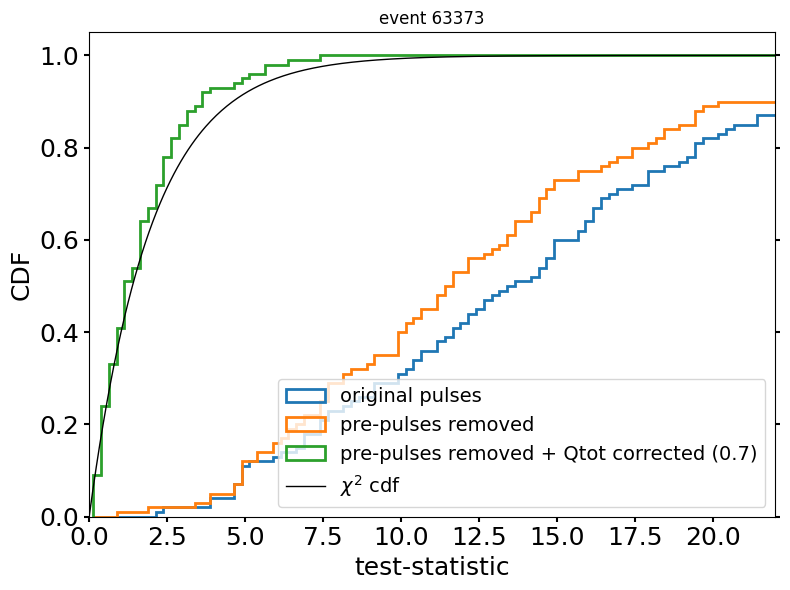

In [5]:
bins = np.linspace(0.0, 100.0, 400)
bins_plot = bins + 0.5 * (bins[1] - bins[0])
binc_plot = 0.5*(bins_plot[1:] + bins_plot[:-1])

cdf_orig, m1 = get_hist(dat_orig, bins)
cdf_filter_prepulse, m2 = get_hist(dat_filter_prepulse, bins)
cdf_filter_prepulse_corr, m3 = get_hist(dat_filter_prepulse_corr, bins)

plot_max = max([m1, m2, m3])+2
xvals = np.linspace(0.0, plot_max, 1000)
yvals = chi2.cdf(xvals, 2)

plt.figure(figsize=(8,6))
plt.hist(binc_plot, bins=bins_plot, weights=cdf_orig, histtype='step', label='original pulses', lw=2)
plt.hist(binc_plot, bins=bins_plot, weights=cdf_filter_prepulse, histtype='step', label='pre-pulses removed', lw=2)
plt.hist(binc_plot, bins=bins_plot, weights=cdf_filter_prepulse_corr, histtype='step', label='pre-pulses removed + Qtot corrected (0.7)', lw=2)
plt.plot(xvals, yvals, 'k-', label='$\\chi^2$ cdf', lw=1)
plt.xlim([0.0, 22])
plt.title(f'event {event_id}')
plt.legend(loc='lower right', fontsize=14)
plt.ylabel('CDF', fontsize=18)
plt.xlabel('test-statistic', fontsize=18)
ax = plt.gca()
ax.tick_params(axis='both', which='both', width=1.5, colors='0.0', labelsize=18)
ax.yaxis.set_ticks_position('both')
plt.tight_layout()
plt.show()

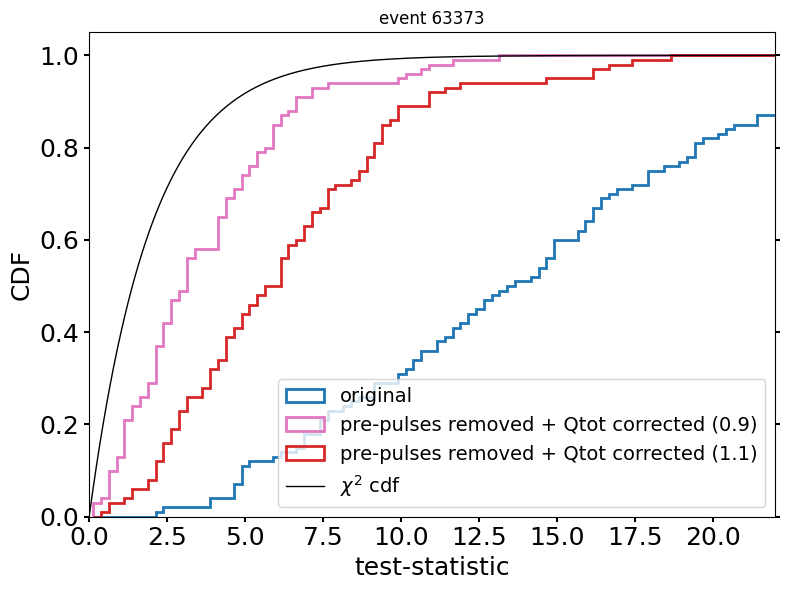

In [6]:
bins = np.linspace(0.0, 100.0, 400)
bins_plot = bins + 0.5 * (bins[1] - bins[0])
binc_plot = 0.5*(bins_plot[1:] + bins_plot[:-1])

cdf_orig, m1 = get_hist(dat_orig, bins)
cdf_filter_prepulse_corr09, m2 = get_hist(dat_filter_prepulse_corr09, bins)
cdf_filter_prepulse_corr11, m3 = get_hist(dat_filter_prepulse_corr11, bins)

plot_max = max([m1, m2, m3])+2
xvals = np.linspace(0.0, plot_max, 1000)
yvals = chi2.cdf(xvals, 2)

plt.figure(figsize=(8,6))
plt.hist(binc_plot, bins=bins_plot, weights=cdf_orig, histtype='step', label='original', lw=2)
plt.hist(binc_plot, bins=bins_plot, weights=cdf_filter_prepulse_corr09, histtype='step', label='pre-pulses removed + Qtot corrected (0.9)', lw=2, color='tab:pink')
plt.hist(binc_plot, bins=bins_plot, weights=cdf_filter_prepulse_corr11, histtype='step', label='pre-pulses removed + Qtot corrected (1.1)', lw=2, color='tab:red')
plt.plot(xvals, yvals, 'k-', label='$\\chi^2$ cdf', lw=1)
plt.xlim([0.0, 22])
plt.title(f'event {event_id}')
plt.legend(loc='lower right', fontsize=14)
plt.ylabel('CDF', fontsize=18)
plt.xlabel('test-statistic', fontsize=18)
ax = plt.gca()
ax.tick_params(axis='both', which='both', width=1.5, colors='0.0', labelsize=18)
ax.yaxis.set_ticks_position('both')
plt.tight_layout()
plt.show()

In [7]:
true = np.load(os.path.join(bp, "original", f"truecoords_event_{event_id}_padded_input.npy"))[0]

#splinempe = np.load(os.path.join(bp, "original", f"splinempecoords_event_{event_id}_padded_input.npy"))

# get splinempe:
bp1 = '/home/storage2/hans/i3files/alerts/bfrv2/nominal/'
sim_handler = I3SimHandler(
        os.path.join(bp1, f'meta_ds_event_{event_id}_N100_from_0_to_100_1st_pulse.ftr'),
        os.path.join(bp1, f'pulses_ds_event_{event_id}_N100_from_0_to_100_1st_pulse.ftr'),
        '/home/storage/hans/jax_reco_new/data/icecube/detector_geometry.csv'
    )

splinempe_zen = []
splinempe_azi = []
for i in range(100):
    try:
        meta, pulses = sim_handler.get_event_data(i)
    except:
        break
        
    splinempe_zen.append(meta['spline_mpe_zenith'])
    splinempe_azi.append(meta['spline_mpe_azimuth'])
    
dat_orig = np.load(os.path.join(bp, "original", f"mincoords_event_{event_id}_padded_input.npy"))
dat_filter_prepulse = np.load(os.path.join(bp, "filter_prepulse", f"mincoords_event_{event_id}_padded_input.npy"))
dat_filter_prepulse_corr = np.load(os.path.join(bp, "sigma_0.7", f"mincoords_event_{event_id}_padded_input.npy"))

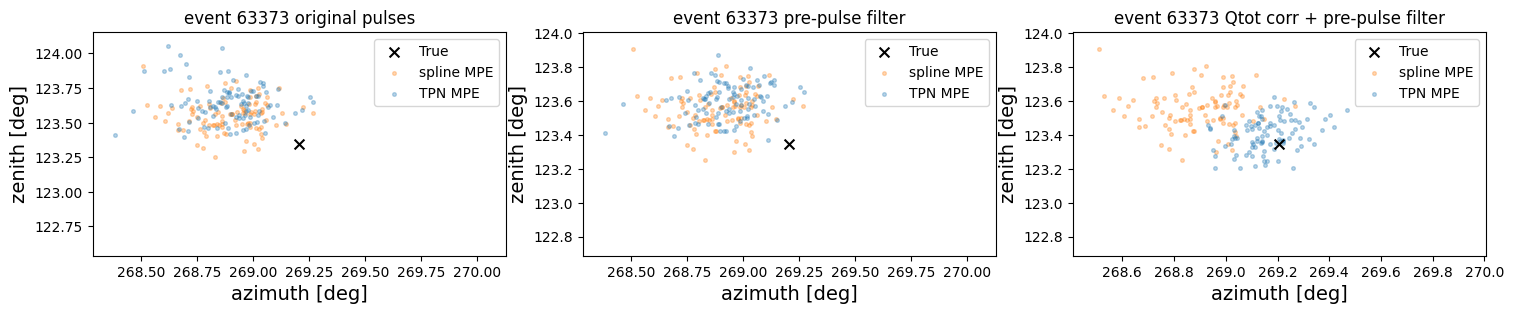

In [8]:
fig, ax = plt.subplots(1,3, figsize=(15,3))
title = ['original pulses', 'pre-pulse filter', 'Qtot corr + pre-pulse filter']
smpe_azi = splinempe_azi
smpe_zen = splinempe_zen
for i,f in enumerate([dat_orig, dat_filter_prepulse, dat_filter_prepulse_corr]):
    true_zen, true_azi = true[0], true[1]
    reco_zen, reco_azi = f[:, 0], f[:, 1]
    ax[i].scatter(np.rad2deg(true_azi), np.rad2deg(true_zen), marker='x', color='black', label='True', s=50, zorder=5)
    ax[i].scatter(np.rad2deg(smpe_azi), np.rad2deg(smpe_zen), label='spline MPE', s=7, color='tab:orange', alpha=0.3)
    ax[i].scatter(np.rad2deg(reco_azi), np.rad2deg(reco_zen), label='TPN MPE', s=7, color='tab:blue', alpha=0.3)
    ax[i].legend()
    ax[i].set_xlabel('azimuth [deg]', fontsize=14)
    ax[i].set_ylabel('zenith [deg]', fontsize=14)
    ax[i].set_title(f"event {event_id} "+title[i])

    xmin = np.rad2deg(true_azi-min(np.min(reco_azi), np.min(smpe_azi)))
    xmax = np.rad2deg(max(np.max(reco_azi), np.max(smpe_azi))-true_azi)
    ymin = np.rad2deg(true_zen-min(np.min(reco_zen), np.min(smpe_zen)))
    ymax = np.rad2deg(max(np.max(reco_zen), np.max(smpe_zen))-true_zen)
    d_zen = max(ymin, ymax)+0.1
    d_azi = max(xmin, xmax)+0.1
    ax[i].set_xlim([np.rad2deg(true_azi)-d_azi, np.rad2deg(true_azi)+d_azi])
    ax[i].set_ylim([np.rad2deg(true_zen)-d_zen, np.rad2deg(true_zen)+d_zen])
    
plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=1.0)
plt.show()

In [9]:
print(len(true))

2


In [10]:
np.rad2deg(max(smpe_azi))

np.float64(269.26940383238787)

In [11]:
meta.keys()

Index(['event_id', 'idx_start', 'idx_end', 'n_channel_HLC', 'neutrino_energy',
       'muon_energy', 'muon_energy_at_detector', 'muon_energy_lost', 'q_tot',
       'n_channel', 'muon_zenith', 'muon_azimuth', 'muon_time', 'muon_pos_x',
       'muon_pos_y', 'muon_pos_z', 'spline_mpe_zenith', 'spline_mpe_azimuth',
       'spline_mpe_time', 'spline_mpe_pos_x', 'spline_mpe_pos_y',
       'spline_mpe_pos_z'],
      dtype='object')

In [12]:
event_data = sim_handler.get_per_dom_summary_from_index(0)

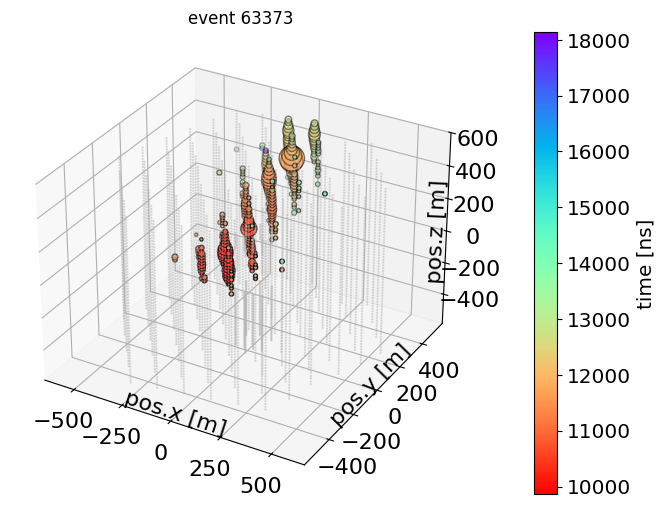

In [13]:
            geo = sim_handler.geo
            fig = plt.figure(figsize=(8,6))
            ax = plt.subplot(projection='3d')
            ax.set_xlabel('pos.x [m]', fontsize=16, labelpad=-25)
            ax.set_ylabel('pos.y [m]', fontsize=16, labelpad=-25)
            ax.set_zlabel('pos.z [m]', fontsize=16, labelpad=-25)
            ax.set_title(f'event {event_id}')

            df = event_data
            idx = df['charge'] > 0
            geo = sim_handler.geo

            try:
                im = ax.scatter(geo['x'], geo['y'], geo['z'], s=0.5, c='0.7', alpha=0.4)
            except:
                pass

            im = ax.scatter(df[idx]['x'], df[idx]['y'], df[idx]['z'], s=np.sqrt(df[idx]['charge']*100), c=df[idx]['time'],
                            cmap='rainbow_r',  edgecolors='k', zorder=1000)
            ax.tick_params(axis='both', which='both', width=1.5, colors='0.0', labelsize=16)
            cb = plt.colorbar(im, orientation="vertical", pad=0.1)
            cb.set_label(label='time [ns]', size='x-large')
            cb.ax.tick_params(labelsize='x-large')
            plt.show()

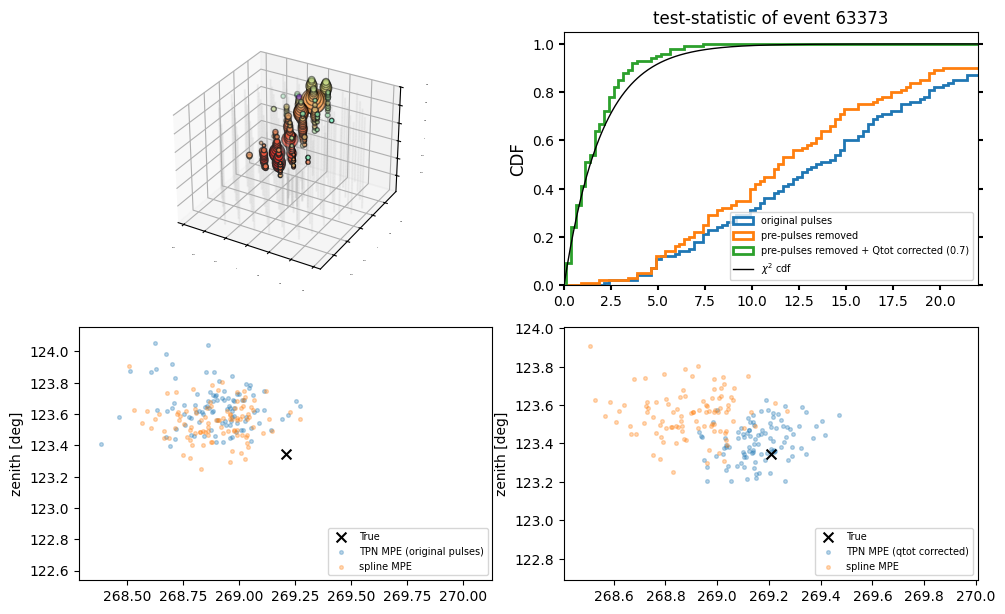

In [14]:
fig = plt.figure(figsize=(10,6))

dat_orig = np.load(os.path.join(bp, "original", f"mincoords_event_{event_id}_padded_input.npy"))
dat_filter_prepulse = np.load(os.path.join(bp, "filter_prepulse", f"mincoords_event_{event_id}_padded_input.npy"))
dat_filter_prepulse_corr = np.load(os.path.join(bp, "sigma_0.7", f"mincoords_event_{event_id}_padded_input.npy"))

ax = fig.add_subplot(2,2,2)
ax.hist(binc_plot, bins=bins_plot, weights=cdf_orig, histtype='step', label='original pulses', lw=2)
ax.hist(binc_plot, bins=bins_plot, weights=cdf_filter_prepulse, histtype='step', label='pre-pulses removed', lw=2)
ax.hist(binc_plot, bins=bins_plot, weights=cdf_filter_prepulse_corr, histtype='step', label='pre-pulses removed + Qtot corrected (0.7)', lw=2)
ax.plot(xvals, yvals, 'k-', label='$\\chi^2$ cdf', lw=1)
ax.set_xlim([0.0, 22])
ax.set_title(f'test-statistic of event {event_id}')
ax.legend(loc='lower right', fontsize=7)
ax.set_ylabel('CDF', fontsize=12)
ax.tick_params(axis='both', which='both', width=1.5, colors='0.0', labelsize=10)
ax.yaxis.set_ticks_position('both')

ax = fig.add_subplot(2,2,1, projection='3d')
df = event_data
idx = df['charge'] > 0
geo = sim_handler.geo

try:
    im = ax.scatter(geo['x'], geo['y'], geo['z'], s=0.5, c='0.7', alpha=0.1)
except:
    pass

im = ax.scatter(df[idx]['x'], df[idx]['y'], df[idx]['z'], s=np.sqrt(df[idx]['charge']*100), c=df[idx]['time'],
                            cmap='rainbow_r',  edgecolors='k', zorder=1000)
ax.tick_params(axis='both', which='both', width=0.0, colors='0.0', labelsize=0)

ax = fig.add_subplot(2,2,3)
f = dat_orig 
true_zen, true_azi = true[0], true[1]
reco_zen, reco_azi = f[:, 0], f[:, 1]
ax.scatter(np.rad2deg(true_azi), np.rad2deg(true_zen), marker='x', color='black', label='True', s=50, zorder=5)
ax.scatter(np.rad2deg(reco_azi), np.rad2deg(reco_zen), label='TPN MPE (original pulses)', s=7, color='tab:blue', alpha=0.3)
ax.scatter(np.rad2deg(smpe_azi), np.rad2deg(smpe_zen), label='spline MPE', s=7, color='tab:orange', alpha=0.3)
xmin = np.rad2deg(true_azi-min(np.min(reco_azi), np.min(smpe_azi)))
xmax = np.rad2deg(max(np.max(reco_azi), np.max(smpe_azi))-true_azi)
ymin = np.rad2deg(true_zen-min(np.min(reco_zen), np.min(smpe_zen)))
ymax = np.rad2deg(max(np.max(reco_zen), np.max(smpe_zen))-true_zen)
d_zen = max(ymin, ymax)+0.1
d_azi = max(xmin, xmax)+0.1
ax.set_xlim([np.rad2deg(true_azi)-d_azi, np.rad2deg(true_azi)+d_azi])
ax.set_ylim([np.rad2deg(true_zen)-d_zen, np.rad2deg(true_zen)+d_zen])
ax.set_ylabel('zenith [deg]')
ax.legend(loc='lower right', fontsize=7)

ax = fig.add_subplot(2,2,4)
f = dat_filter_prepulse_corr 
true_zen, true_azi = true[0], true[1]
reco_zen, reco_azi = f[:, 0], f[:, 1]
ax.scatter(np.rad2deg(true_azi), np.rad2deg(true_zen), marker='x', color='black', label='True', s=50, zorder=5)
ax.scatter(np.rad2deg(reco_azi), np.rad2deg(reco_zen), label='TPN MPE (qtot corrected)', s=7, color='tab:blue', alpha=0.3)
ax.scatter(np.rad2deg(smpe_azi), np.rad2deg(smpe_zen), label='spline MPE', s=7, color='tab:orange', alpha=0.3)
xmin = np.rad2deg(true_azi-min(np.min(reco_azi), np.min(smpe_azi)))
xmax = np.rad2deg(max(np.max(reco_azi), np.max(smpe_azi))-true_azi)
ymin = np.rad2deg(true_zen-min(np.min(reco_zen), np.min(smpe_zen)))
ymax = np.rad2deg(max(np.max(reco_zen), np.max(smpe_zen))-true_zen)
d_zen = max(ymin, ymax)+0.1
d_azi = max(xmin, xmax)+0.1
ax.set_xlim([np.rad2deg(true_azi)-d_azi, np.rad2deg(true_azi)+d_azi])
ax.set_ylim([np.rad2deg(true_zen)-d_zen, np.rad2deg(true_zen)+d_zen])
ax.set_ylabel('zenith [deg]')
ax.legend(loc='lower right', fontsize=7)

plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=1.0)
plt.show()

In [15]:
starting_events = set([8, 1722, 9410, 19455, 21663, 25632, 27285, 32839, 40023, 51687, 57174, 59010, 59228, 63373])

In [16]:
event_ids = ['1022', '10393', '10644', '10738', '11086', '11232', '13011',
       '13945', '14017', '14230', '15243', '16416', '16443', '1663',
       '1722', '17475', '18846', '19455', '20027', '21113', '21663',
       '22232', '22510', '22617', '23574', '23638', '23862', '24530',
       '24726', '25181', '25596', '25632', '27063', '27188', '27285',
       '28188', '28400', '29040', '29707', '3062', '31920', '31989',
       '32781', '32839', '33119', '33656', '34506', '35349', '37086',
       '37263', '37448', '37786', '37811', '39166', '39962', '40023',
       '41381', '41586', '42566', '42568', '42677', '43153', '43483',
       '4397', '44081', '48309', '48448', '48632', '49067', '50832',
       '51687', '51956', '54374', '55301', '55526', '55533', '56041',
       '5620', '56741', '56774', '57174', '57394', '57723', '59010',
       '59029', '59089', '59099', '59228', '62274', '62512', '63373',
       '65472', '6586', '8', '8604', '8674', '8840', '9410', '9419',
       '9505']

In [17]:
cdfs = []

for event_id in event_ids:
    #if int(event_id) in starting_events:
    #    continue
    try:
        dat_filter_prepulse_corr = np.load(os.path.join(bp, "sigma_0.7", f"llh_results_event_{event_id}_padded_input.npy"))
    except:
        continue
        
    cdf, _ = cdf_filter_prepulse_corr, m3 = get_hist(dat_filter_prepulse_corr, bins)
    cdfs.append(cdf)

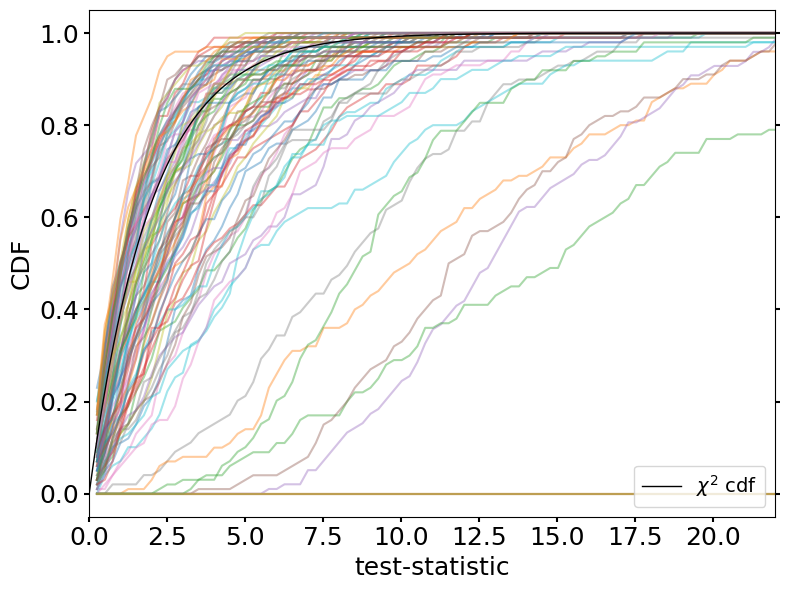

In [18]:
plot_max = max([m1, m2, m3])+2
xvals = np.linspace(0.0, plot_max, 1000)
yvals = chi2.cdf(xvals, 2)

plt.figure(figsize=(8,6))

for cdf in cdfs:
    plt.plot(bins[1:], cdf, alpha=0.4)
    #plt.hist(binc_plot, bins=bins_plot, weights=cdf, histtype='step', alpha=0.4)


plt.plot(xvals, yvals, 'k-', label='$\\chi^2$ cdf', lw=1)
plt.xlim([0.0, 22])
plt.legend(loc='lower right', fontsize=14)
plt.ylabel('CDF', fontsize=18)
plt.xlabel('test-statistic', fontsize=18)

ax = plt.gca()
ax.tick_params(axis='both', which='both', width=1.5, colors='0.0', labelsize=18)
ax.yaxis.set_ticks_position('both')
plt.tight_layout()
plt.show()

In [19]:
cdfs = []
succ_ids = []

for event_id in event_ids:
    if int(event_id) in starting_events:
        continue
    try:
        dat_filter_prepulse_corr = np.load(os.path.join(bp, "sigma_0.7", f"llh_results_event_{event_id}_padded_input.npy"))
    except:
        continue
        
    cdf, _ = cdf_filter_prepulse_corr, m3 = get_hist(dat_filter_prepulse_corr, bins)
    if cdf[50] > 0.1:
        succ_ids.append(event_id)
    else:
        continue
    cdfs.append(cdf)

In [20]:
print(len(succ_ids))
print(len(event_ids))

78
100


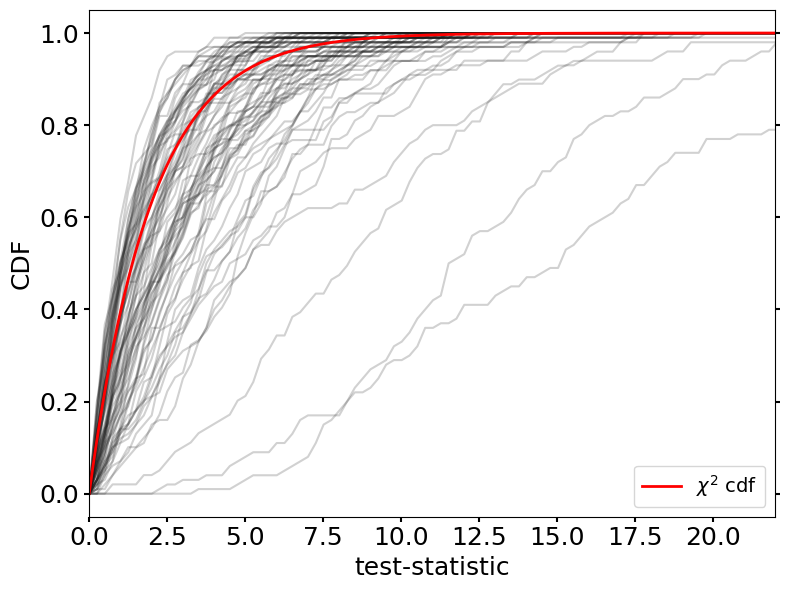

In [21]:
plot_max = max([m1, m2, m3])+2
xvals = np.linspace(0.0, plot_max, 1000)
yvals = chi2.cdf(xvals, 2)

plt.figure(figsize=(8,6))

for cdf in cdfs:
    plt.plot(bins, np.concatenate([np.array([0]), cdf]), alpha=0.2, color='0.1')
    #plt.hist(binc_plot, bins=bins_plot, weights=cdf, histtype='step', alpha=0.4)


plt.plot(xvals, yvals, 'r-', label='$\\chi^2$ cdf', lw=2)
plt.xlim([0.0, 22])
plt.legend(loc='lower right', fontsize=14)
plt.ylabel('CDF', fontsize=18)
plt.xlabel('test-statistic', fontsize=18)

ax = plt.gca()
ax.tick_params(axis='both', which='both', width=1.5, colors='0.0', labelsize=18)
ax.yaxis.set_ticks_position('both')
plt.tight_layout()
plt.show()

In [33]:
all = []
for event_id in succ_ids:
    if int(event_id) in starting_events:
        continue
    try:
        dat_filter_prepulse_corr = np.load(os.path.join(bp, "sigma_0.7", f"llh_results_event_{event_id}_padded_input.npy"))
    except:
        continue

    all.append( dat_filter_prepulse_corr[:, 0][np.isfinite(dat_filter_prepulse_corr[:, 0])] )

all = np.concatenate(all)

In [23]:
cdf = get_cdf(all, bins)

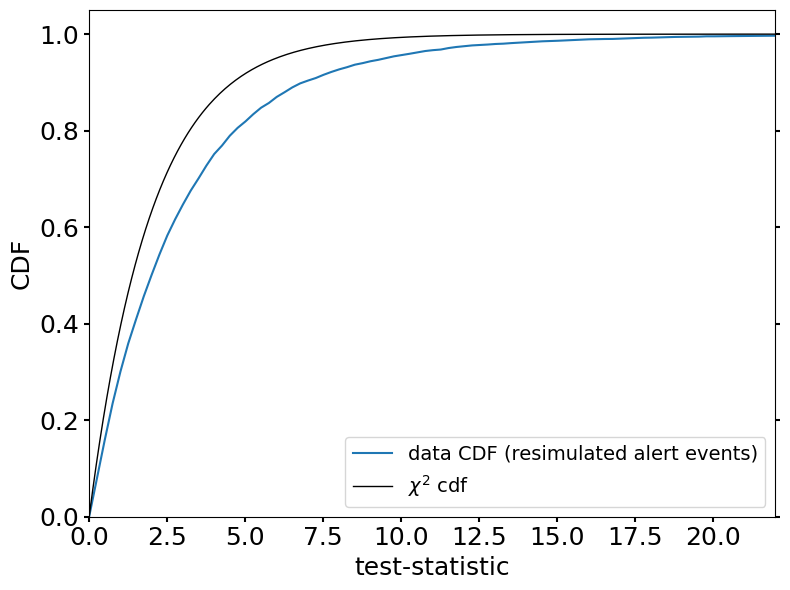

In [24]:
plot_max = max([m1, m2, m3])+2
xvals = np.linspace(0.0, plot_max, 1000)
yvals = chi2.cdf(xvals, 2)

plt.figure(figsize=(8,6))

plt.plot(bins, np.concatenate([np.array([0]), cdf]), label='data CDF (resimulated alert events)')


plt.plot(xvals, yvals, 'k-', label='$\\chi^2$ cdf', lw=1)
plt.xlim([0.0, 22])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right', fontsize=14)
plt.ylabel('CDF', fontsize=18)
plt.xlabel('test-statistic', fontsize=18)

ax = plt.gca()
ax.tick_params(axis='both', which='both', width=1.5, colors='0.0', labelsize=18)
ax.yaxis.set_ticks_position('both')
plt.tight_layout()
plt.show()

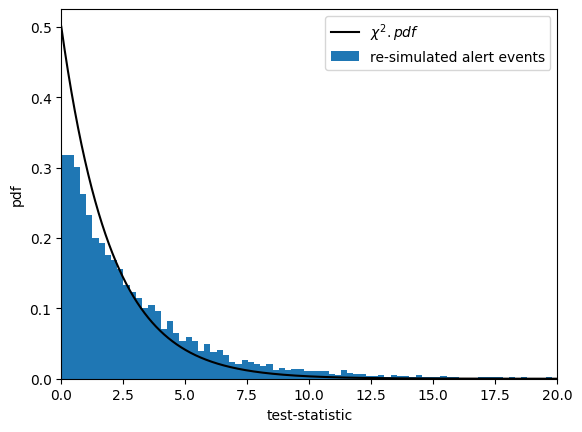

In [25]:
xvals = np.linspace(0.0, 20.0, 10000)
yvals = chi2.pdf(xvals, 2)
bins = np.linspace(0.0, 100, 400)
plt.figure()
plt.plot(xvals, yvals,  "k-", label = '$\chi^2.pdf$',)
plt.hist(all, density=True, bins=bins, label='re-simulated alert events')
plt.legend()
plt.ylabel('pdf')
plt.xlabel('test-statistic')
plt.xlim([0.0, 20])
plt.show()

In [26]:
cdfs = []

for event_id in succ_ids:
    #if int(event_id) in starting_events:
    #    continue
    try:
        dat_filter_prepulse_corr = np.load(os.path.join(bp, "original", f"llh_results_event_{event_id}_padded_input.npy"))
    except:
        continue

    cdf, _ = cdf_filter_prepulse_corr, m3 = get_hist(dat_filter_prepulse_corr, bins)
    cdfs.append(cdf)

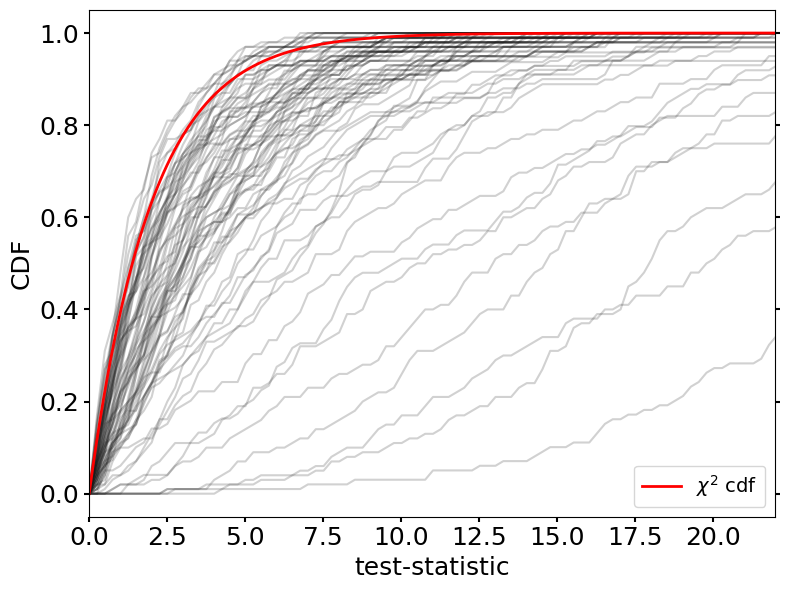

In [27]:
plot_max = max([m1, m2, m3])+2
xvals = np.linspace(0.0, plot_max, 1000)
yvals = chi2.cdf(xvals, 2)

plt.figure(figsize=(8,6))

for cdf in cdfs:
    plt.plot(bins, np.concatenate([np.array([0]), cdf]), alpha=0.2, color='0.1')
    #plt.hist(binc_plot, bins=bins_plot, weights=cdf, histtype='step', alpha=0.4)


plt.plot(xvals, yvals, 'r-', label='$\\chi^2$ cdf', lw=2)
plt.xlim([0.0, 22])
plt.legend(loc='lower right', fontsize=14)
plt.ylabel('CDF', fontsize=18)
plt.xlabel('test-statistic', fontsize=18)

ax = plt.gca()
ax.tick_params(axis='both', which='both', width=1.5, colors='0.0', labelsize=18)
ax.yaxis.set_ticks_position('both')
plt.tight_layout()
plt.show()

In [28]:
bins[50]

np.float64(12.531328320802004)

In [34]:
all_no_corr = []
for event_id in succ_ids:
    if int(event_id) in starting_events:
        continue
    try:
        dat_filter_prepulse_corr = np.load(os.path.join(bp, "original", f"llh_results_event_{event_id}_padded_input.npy"))
    except:
        continue

    all_no_corr.append( dat_filter_prepulse_corr[:, 0][np.isfinite(dat_filter_prepulse_corr[:, 0])] )

all_no_corr = np.concatenate(all_no_corr)

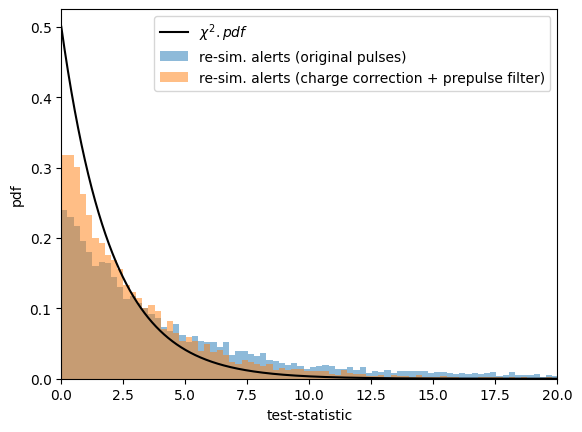

In [42]:
xvals = np.linspace(0.0, 20.0, 10000)
yvals = chi2.pdf(xvals, 2)
bins = np.linspace(0.0, 100, 400)
plt.figure()
plt.plot(xvals, yvals,  "k-", label = '$\chi^2.pdf$',)
plt.hist(all_no_corr, density=True, bins=bins, label='re-sim. alerts (original pulses)', alpha=0.5)
plt.hist(all, density=True, bins=bins, label='re-sim. alerts (charge correction + prepulse filter)', alpha=0.5)
plt.legend()
plt.ylabel('pdf')
plt.xlabel('test-statistic')
plt.xlim([0.0, 20])
plt.show()

In [44]:
print(len(all) / 99)

78.17171717171718


In [45]:
# 22 events.